<a href="https://colab.research.google.com/github/Ahmed-Wassel-Angar/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ahmed Wassel Angar** - sales-predictions

In [1]:
# Mount google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [34]:
# Import librairies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In the next step we will load data in a variable called "raw_Data" then assign it to a "df" variable.

We will be working directly on the dataframe "df" and keep the original data in the dataframe "raw_data".

We think that this is a good approach in case we want to go back to the original file for comparison or any other reason.

In [3]:
filepath="/content/drive/MyDrive/Coding Dojo/Data Sets/sales_predictions_2023.csv"
raw_df = pd.read_csv(filepath)
df = raw_df
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### We will use the following Data Dictionary as a reference for data cleaning and consistency check:

Variable  | Description
-------------------|------------------
Item_Identifier             | Unique product ID
Item_Weight                 | Weight of product
Item_Fat_Content            | Whether the product is low fat or regular
Item_Visibility             | The percentage of total display area of all products in a store allocated to the particular product
Item_Type                   | The category to which the product belongs
Item_MRP                    | Maximum Retail Price (list price) of the product
Outlet_Identifier           | Unique store ID
Outlet_Establishment_Year   | The year in which store was established
Outlet_Size                 | The size of the store in terms of ground area covered
Outlet_Location_Type        | The type of area in which the store is located
Outlet_Type                 | Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales           | Sales of the product in the particular store. This is the target variable to be predicted.
---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**1.How many rows and columns?**

In [5]:
df.shape

(8523, 12)

**2. What are the datatypes of each variable?**

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**3.Are there duplicates? If so, drop any duplicates.**

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [8]:
df.duplicated().sum()

0

=> There are no duplicated rows.

**4.Identify missing values.**

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

=> Both of columns "Outlet_Size" and "Item_Weight" present missing values.

**5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).**

Addressing the "Outlet_Size" missing values :

In [10]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [12]:
df.groupby("Outlet_Type")["Outlet_Size"].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [13]:
df["Outlet_Size"].fillna("Missing",inplace=True)

In [14]:
df["Outlet_Size"].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [15]:
df.groupby("Outlet_Type")["Outlet_Size"].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Missing         555
                   Small           528
Supermarket Type1  Small          1860
                   Missing        1855
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

=> All outlets that are of type Grocery are Small sized stores, so the missing values probably will be small.  

=> For types "Supermarket Type2" and "Supermarket Type3", There are no missing values.

In [16]:
Grocery_Store_Filter = df["Outlet_Type"]=="Grocery Store"
Missing_Outlet_Size_Filter = df["Outlet_Size"]=="Missing"
df.loc[Grocery_Store_Filter & Missing_Outlet_Size_Filter,["Outlet_Size"]]="Small"

In [17]:
df.groupby("Outlet_Type")["Outlet_Size"].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small          1083
Supermarket Type1  Small          1860
                   Missing        1855
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

=> For the type "Supermarket Type1", there are all sizes, so "Missing" values could be any of the three sizes. To address this, We could have tried to approximate the area of the store using the number of items that contains and the item types displayed if we had the number of items in each store.

In [18]:
df.groupby("Outlet_Identifier")["Item_Identifier"].value_counts()

Outlet_Identifier  Item_Identifier
OUT010             DRA12              1
                   DRA24              1
                   DRA59              1
                   DRB13              1
                   DRB25              1
                                     ..
OUT049             NCZ18              1
                   NCZ30              1
                   NCZ42              1
                   NCZ53              1
                   NCZ54              1
Name: Item_Identifier, Length: 8523, dtype: int64

=> Since value_counts of each Item in each store is equal to 1, this technique is not possible.

In [19]:
df.groupby(["Outlet_Location_Type","Outlet_Type"])["Outlet_Size"].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           528
                      Supermarket Type1  Medium          930
                                         Small           930
Tier 2                Supermarket Type1  Missing        1855
                                         Small           930
Tier 3                Grocery Store      Small           555
                      Supermarket Type1  High            932
                      Supermarket Type2  Medium          928
                      Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

=> All remaining Outlets with missing size are of type supermarket Type1 and are located in Tier 2 area.

In [20]:
df.groupby(["Outlet_Type","Outlet_Location_Type","Outlet_Size","Outlet_Identifier"])["Item_Outlet_Sales"].mean()

Outlet_Type        Outlet_Location_Type  Outlet_Size  Outlet_Identifier
Grocery Store      Tier 1                Small        OUT019                340.329723
                   Tier 3                Small        OUT010                339.351662
Supermarket Type1  Tier 1                Medium       OUT049               2348.354635
                                         Small        OUT046               2277.844267
                   Tier 2                Missing      OUT017               2340.675263
                                                      OUT045               2192.384798
                                         Small        OUT035               2438.841866
                   Tier 3                High         OUT013               2298.995256
Supermarket Type2  Tier 3                Medium       OUT018               1995.498739
Supermarket Type3  Tier 3                Medium       OUT027               3694.038558
Name: Item_Outlet_Sales, dtype: float64

=> All the missing values of size corressponds to the two outlets identified by OUT017 and OUT045. And it is obvious that both are Supermarkets of Type 1 located in area Tier 2. The only outlet with the same characteristics is outlet number OUT035 wich is of size small and already have a bigger average sales (2438.841 > 2340.675) and (2438.841 > 2192.384).

Hence, We will consider the missing values of columns "Outlet_Size" as "Small" and fill the remaining value as so.

In [21]:
df["Outlet_Size"].replace("Missing","Small",inplace=True)

In [22]:
df["Outlet_Size"].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

Adjusting missing values of "Item_Weight" column:

In [23]:
# Cheking the minimum value so it is different than 0.

df["Item_Weight"].min()

4.555

In [24]:
# Getting an idea of the mean weights per item type

df.groupby(["Item_Type"])["Item_Weight"].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

We will replace each missing value in column "Item_Weight" by the average value of the same item_type

In [25]:
for _type in df["Item_Type"].value_counts().keys():                         # getting all types one by one to create a filter for each one within the for loop
  _type_filter = df["Item_Type"] == _type                                    # creating a new filter to get the sub item Item Type category
  avg_weight = df.loc[_type_filter,["Item_Weight"]].mean()[0]               # calculating average weight of sub Item Type category
  df.loc[_type_filter & df["Item_Weight"].isna(),["Item_Weight"]]=avg_weight # filling missing values with the mean of the average weight of subcategory


**6. Confirm that there are no missing values after addressing them.**

In [26]:
# Verifying that all missing value does no more exist

df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)**

In [27]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [28]:
# checking different categories in each column

for index in df.columns:
  print(df[index].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
13.224769    213
12.987880    212
13.384736    151
12.867061    138
13.426069    116
            ... 
5.675000       2
9.420000       1
6.520000       1
7.685000       1
5.400000       1
Name: Item_Weight, Length: 431, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Sof

In [29]:
# adjusting values of column "Item_Fat_Content"

df["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("reg","Regular",inplace=True)
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [30]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


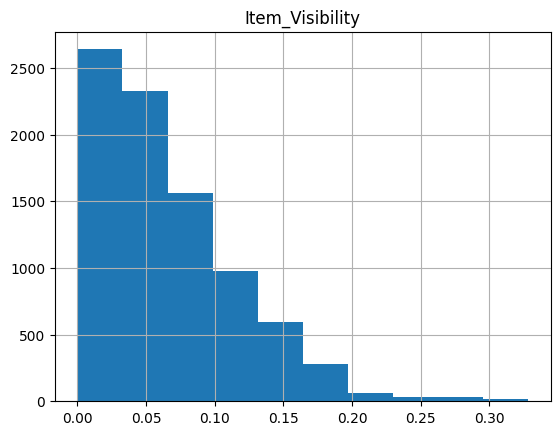

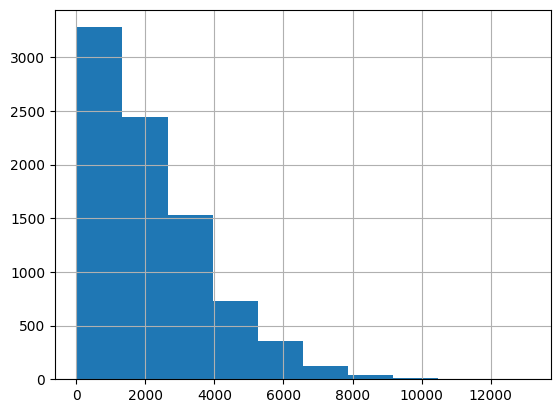

In [48]:
df.hist(["Item_Visibility"])
plt.show()
df["Item_Outlet_Sales"].hist()
plt.show()

<BarContainer object of 8523 artists>

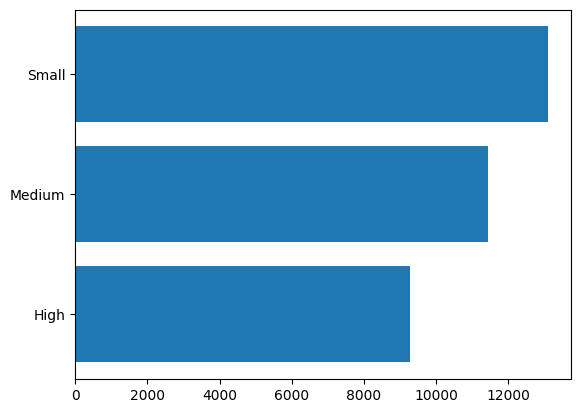

In [59]:
plt.barh(df["Outlet_Size"].sort_values(),df["Item_Outlet_Sales"])

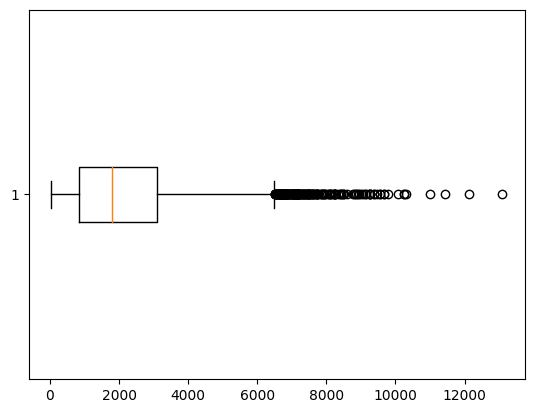

In [60]:
plt.boxplot(df["Item_Outlet_Sales"],vert=False);